In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from helpers import QL_one_game, Q1, Q2, Q3, Q4, Q7
from nim_env import NimEnv, OptimalPlayer, QL_Player
%matplotlib inline
plt.rc('text', usetex = True)

# Q-Learning agent

### Q1)

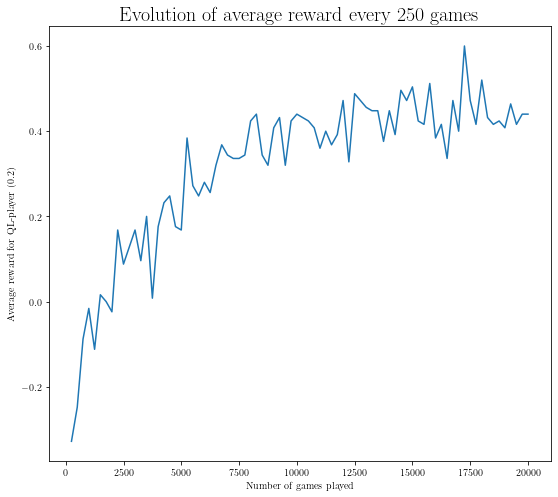

In [3]:
Q1(eps = 0.2, eps_opt = 0.5, nb_games = 20000, nb_samples = 1) #nb_games = 30, eps = 0.2, eps_opt = 0.7, step = 1)

### Q2)

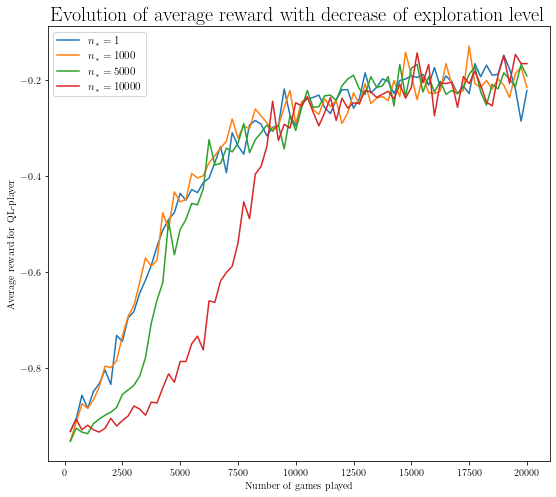

In [6]:
N_star = [1, 1000, 5000, 10000]
Q2(nb_games = 20000, eps_min = 0.1, eps_max = 0.8, alpha = 0.1, gamma = 0.99, step = 250, seed = None, N_star = N_star, nb_samples = 5)

With a big $N_*$, the decrease of epsilon is very slow, and stays very close to $\epsilon_\text{max} = 0.8$. This prevents the algorithm from reaching a good performance after $20000$ games, compared to having a fixed epsilon. Surprisingly, with almost no exploration, the algorithm yields a similar performance as with 1000 games of exploration.

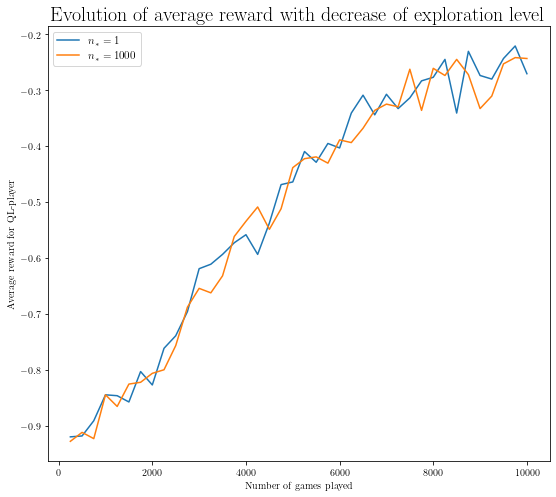

In [13]:
N_star = [1, 1000]
Q2(nb_games = 10000, eps_min = 0.1, eps_max = 0.8, alpha = 0.1, gamma = 0.99, 
   step = 250, seed = None, N_star = N_star, question = "q2-2_small", nb_samples = 5)

### Q3)

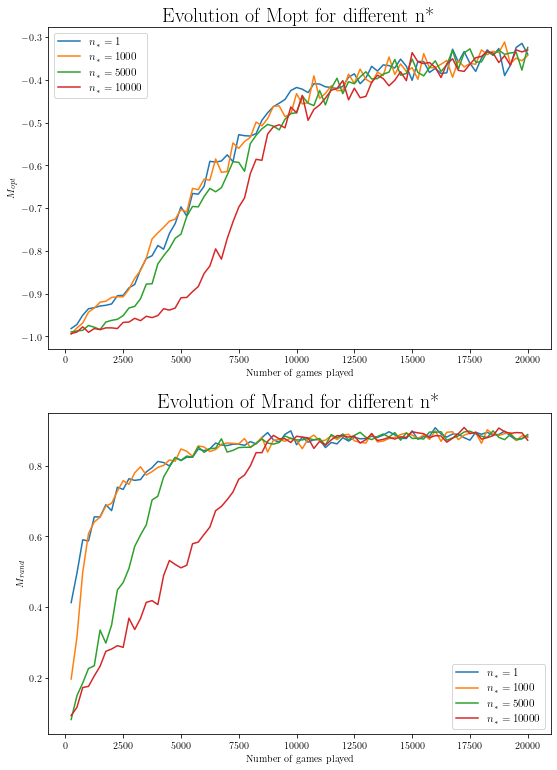

In [3]:
N_star = [1, 1000, 5000, 10000]
Q3(nb_games = 20000, eps_min = 0.1, eps_max = 0.8, alpha = 0.1, gamma = 0.99, step = 250, seed = None, 
   N_star = N_star, nb_samples = 1)

Even though $n_* = 1$ is as good as $n_* = 1000$, we will choose $n_* = 1000$ in order to keep some exploration

### Q4)

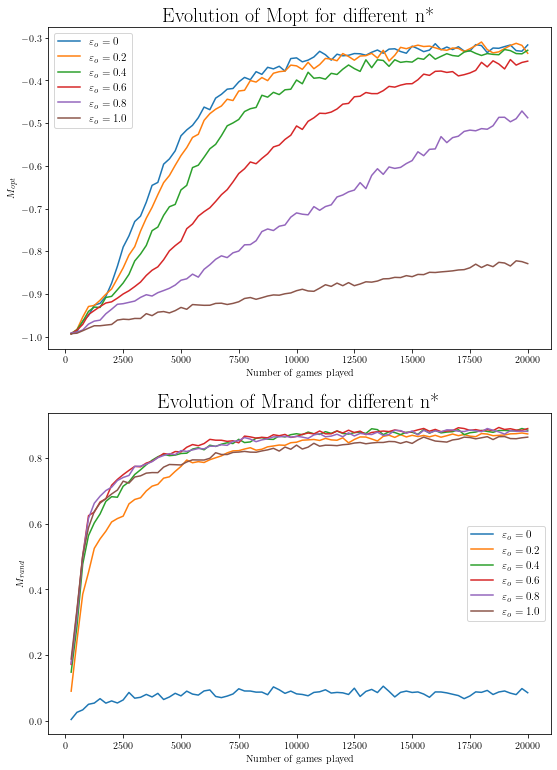

In [4]:
Eps_opt = [0, 0.2, 0.4, 0.6, 0.8, 1.]
n_star = 1000
Q4(nb_games = 20000, eps_min = 0.1, eps_max = 0.8, alpha = 0.1, gamma = 0.99, step = 250, seed = None, 
   n_star = n_star, nb_samples = 5, Eps_opt = Eps_opt)

The first graph shows, as expected, that when the randomness increases for the optimal player, the performance against an optimal player decreases. It makes sense since the QL player didn't learn at all to play against a "good" player. Ont he second graph we can see that $M_{\text{rand}}$ has similar evolution for $\varepsilon_{\text{opt}} < 1$, but for $1$, the performance is really bad. This can be explained by the fact that the QL-player has been trained to play a player that sometimes plays the optimal coup. But when it is faced to a totally random player, it sees configurations of the game that it has never seen before. Hence Q-values are still not updated and it is as if the training was useless. Hence the "bad" performance.

### Q5)

Il faudra changer les fonctions fonctions pour qu'elles retournent les $M_{\text{rand}}$ et $M_{\text{opt}}$

For $M_{\text{opt}}$, the best value attained seems to be $-0.3$ and for $M_{\text{rand}}$ the highest value seems to be $0.83$

### Q6)

No, they don't have the same values. Playing against $\text{opt}(0)$ will tend to make the QL-player biased toward playing the optimal policy and updating only the relevant Q-values (exploitation is favored). On the other hand, playing against $\text{opt}(1)$ will tend to make the QL-player update all its Q-values (exploration is favored).

### Q7)

new games

player:  0 current config:  250 previous config:  [2, 5, 0] action:  [2, 1, 0] other move:  [3, 1] reward:  0
updating config  250
{'050': 0, '150': 0, '200': 0, '210': 0.0, '220': 0, '230': 0, '240': 0}
player:  1 current config:  210 previous config:  [2, 5, 1] action:  [2, 5, 0] other move:  [2, 4] reward:  0
updating config  251
{'051': 0, '151': 0, '201': 0, '211': 0, '221': 0, '231': 0, '241': 0, '250': 0.0}
player:  1 current config:  210 previous config:  [2, 1, 0] action:  [0, 1, 0] other move:  [2, 4] reward:  0
updating config  210
{'010': 0.0, '110': 0, '200': 0}
player:  0 current config:  010 previous config:  [2, 5, 0] action:  [2, 1, 0] other move:  [1, 2] reward:  0
updating config  250
{'050': 0, '150': 0, '200': 0, '210': 0.0, '220': 0, '230': 0, '240': 0}
player:  0 current config:  010 previous config:  [0, 1, 0] action:  [0, 0, 0] other move:  [1, 2] reward:  -1
updating config  010
{'000': -0.1}
player:  1 current config:  000 previous config:  [2, 1, 

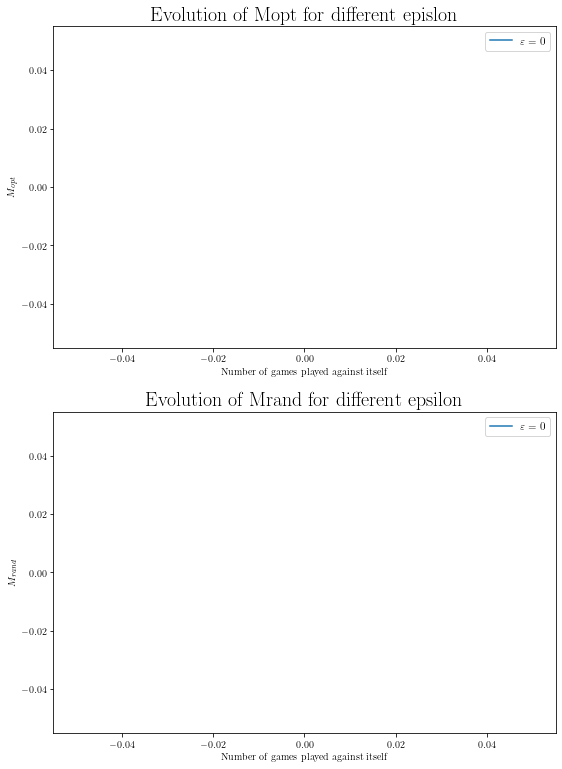

In [2]:
Eps = [0, 0.2, 0.4, 0.6, 0.8, 1.]
Eps = [0]
Q7(Eps = Eps, nb_games = 20, alpha = 0.1, gamma = 0.99, step = 250, seed = 1, question = 'q2-7', nb_samples = 1)

### Q8)

### Q9)

### Q10)

# Nim environment

Our 2nd game is the famous game of Nim. You can read about the game and its rules here: https://en.wikipedia.org/wiki/Nim

**Important note:** We consider the normal (i.e. not misere) game: the player taking the last object *wins*.

We implemented the game as an environment in the style of games in the [Python GYM library](https://gym.openai.com/). The commented source code is available in the file "nim_env.py". Here, we give a brief introduction to the environment and how it can be used.

### Initialization and attributes

Given a random seed, you can initialize the environment / game in a random state (3 heaps with between 1 to 7 sticks in each heap) as following:

In [2]:
env = NimEnv(seed = 3)

Which then has the following attributes with the corresponding initial values:

In [3]:
env.__dict__

{'n_heap': 3,
 'n_agents': 2,
 'current_player': 0,
 'winner': None,
 'end': False,
 'num_step': 0,
 'heaps': [2, 5, 6],
 'heap_avail': [True, True, True],
 'heap_keys': ['1', '2', '3']}

The game is played by two players: player 0 and player 1. The attribute 'current_player' shows whose turn it is. We assume that player 0 always plays first.

The attribute 'heaps' is a numpy array of size 3 and presents the board in the real game and the state $s_t$ in the reinfocement learning language. Each number shows available number of sticks in each heap. The attribute 'heap_avail' shows which heaps can be used. 
        
The attribute 'end' shows if the game is over or not, and the attribute 'winner' shows the winner of the game.

You can use function 'render' to visualize the current position of the board:

In [4]:
env.render()

───────────────────────────────────
Heap 1: ||              	 (2)
───────────────────────────────────
Heap 2: |||||           	 (5)
───────────────────────────────────
Heap 3: ||||||          	 (6)
───────────────────────────────────


### Taking actions

The game environment will recieve action from two players in turn and update the heaps. At each time, one player can take the action $a_t$, where $a_t$=action can is a vector of 2 integer: action[0] $\in \{ 1,2,3 \}$ is the number of heap and action[1] > 0 the number of sticks to be taken from that heap.

Function 'step' is used to recieve the action of the player, update the grid:

In [5]:
env.step([1,2])

([0, 5, 6], False, None)

In [6]:
env.render()

───────────────────────────────────
Heap 1:                 	 (0)
───────────────────────────────────
Heap 2: |||||           	 (5)
───────────────────────────────────
Heap 3: ||||||          	 (6)
───────────────────────────────────


In [7]:
env.__dict__

{'n_heap': 3,
 'n_agents': 2,
 'current_player': 1,
 'winner': None,
 'end': False,
 'num_step': 1,
 'heaps': [0, 5, 6],
 'heap_avail': [False, True, True],
 'heap_keys': ['1', '2', '3']}

In [8]:
env.step([2,3])

([0, 2, 6], False, None)

In [9]:
env.render()

───────────────────────────────────
Heap 1:                 	 (0)
───────────────────────────────────
Heap 2: ||              	 (2)
───────────────────────────────────
Heap 3: ||||||          	 (6)
───────────────────────────────────


In [10]:
env.__dict__

{'n_heap': 3,
 'n_agents': 2,
 'current_player': 0,
 'winner': None,
 'end': False,
 'num_step': 2,
 'heaps': [0, 2, 6],
 'heap_avail': [False, True, True],
 'heap_keys': ['1', '2', '3']}

But not all actions are available at each time: One cannot take sticks from an unavailable action is taken. There is an error if an unavailable action is taken:

In [11]:
env.step([2,3])

AssertionError: You cannot take more objects than there are in the heap

Not taking any stick is also unavailable:

In [12]:
env.step([2,0])

AssertionError: You must take at least 1 object from the heap

### Reward

Reward is always 0 until the end of the game. When the game is over, the reward is 1 if you win the game and -1 if you lose. Function 'observe' can be used after each step to recieve the new state $s_t$, whether the game is over, and the winner, and function 'reward' to get the reward value $r_t$:

In [13]:
env.observe()

([0, 2, 6], False, None)

In [14]:
env.reward(player=0)

0

In [15]:
env.reward(player=1)

0

An example of finishing the game:

In [16]:
print("Player = " + str(env.current_player))
env.step([2,2])
env.render()
print("Player = " + str(env.current_player))
env.step([3,6])
env.render()

Player = 0
───────────────────────────────────
Heap 1:                 	 (0)
───────────────────────────────────
Heap 2:                 	 (0)
───────────────────────────────────
Heap 3: ||||||          	 (6)
───────────────────────────────────
Player = 1
───────────────────────────────────
Heap 1:                 	 (0)
───────────────────────────────────
Heap 2:                 	 (0)
───────────────────────────────────
Heap 3:                 	 (0)
───────────────────────────────────


In [17]:
env.observe()

([0, 0, 0], True, 1)

In [18]:
env.reward(player=0)

-1

In [19]:
env.reward(player=1)

1

# Optimal policy for the Nim environment

Fortunately, we know the exact optimal policy for Nim. We have implemented and $\epsilon$-greedy version of optimal polciy which you can use for the project.

In [20]:
env.reset(seed=6);

In [21]:
env.render()

───────────────────────────────────
Heap 1: |||||||         	 (7)
───────────────────────────────────
Heap 2: |||||           	 (5)
───────────────────────────────────
Heap 3: |               	 (1)
───────────────────────────────────


In [22]:
env.__dict__

{'n_heap': 3,
 'n_agents': 2,
 'current_player': 0,
 'winner': None,
 'end': False,
 'num_step': 0,
 'heaps': [7, 5, 1],
 'heap_avail': [True, True, True],
 'heap_keys': ['1', '2', '3']}

In [23]:
opt_player = OptimalPlayer(epsilon = 0., player = 0)

In [24]:
opt_player.act(env.heaps)

[1, 3]

In [25]:
opt_player.player

0

### An example of optimal player playing against random player

In [26]:
Turns = np.array([0,1])
for i in range(5):
    env.reset()
    heaps, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt = OptimalPlayer(epsilon=0., player=Turns[0])
    player_rnd = OptimalPlayer(epsilon=1., player=Turns[1])
    while not env.end:
        if env.current_player == player_opt.player:
            move = player_opt.act(heaps)
        else:
            move = player_rnd.act(heaps)

        heaps, end, winner = env.step(move)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player = ' +  str(Turns[0]))
            print('Random player = ' +  str(Turns[1]))
            env.reset()
            break


-------------------------------------------
Game end, winner is player 0
Optimal player = 0
Random player = 1
-------------------------------------------
Game end, winner is player 1
Optimal player = 1
Random player = 0
-------------------------------------------
Game end, winner is player 1
Optimal player = 1
Random player = 0
-------------------------------------------
Game end, winner is player 1
Optimal player = 1
Random player = 0
-------------------------------------------
Game end, winner is player 1
Optimal player = 1
Random player = 0


### An example of optimal player playing against optimal player

In [27]:
Turns = np.array([0,1])
for i in range(5):
    env.reset()
    heaps, _, __ = env.observe()
    Turns = Turns[np.random.permutation(2)]
    player_opt_1 = OptimalPlayer(epsilon=0., player=Turns[0])
    player_opt_2 = OptimalPlayer(epsilon=0., player=Turns[1])
    while not env.end:
        if env.current_player == player_opt_1.player:
            move = player_opt_1.act(heaps)
        else:
            move = player_opt_2.act(heaps)

        heaps, end, winner = env.step(move)

        if end:
            print('-------------------------------------------')
            print('Game end, winner is player ' + str(winner))
            print('Optimal player 1 = ' +  str(Turns[0]))
            print('Optimal player 2 = ' +  str(Turns[1]))
            env.reset()
            break


-------------------------------------------
Game end, winner is player 1
Optimal player 1 = 1
Optimal player 2 = 0
-------------------------------------------
Game end, winner is player 0
Optimal player 1 = 1
Optimal player 2 = 0
-------------------------------------------
Game end, winner is player 0
Optimal player 1 = 1
Optimal player 2 = 0
-------------------------------------------
Game end, winner is player 1
Optimal player 1 = 1
Optimal player 2 = 0
-------------------------------------------
Game end, winner is player 1
Optimal player 1 = 1
Optimal player 2 = 0
